In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Read the data
data = None
with open('log.txt') as f:
    data = f.read().splitlines()
    
filtered_data = []
for line in data:
    if 'compass_calibration' in line:
        words = line.split()
        values = [words[3], words[4], words[5]]
        for i in range(3):
            values[i] = values[i].strip(',')
        filtered_data.append(values)
        
print(filtered_data)

[['1437', '-2675', '1752'], ['1457', '-2697', '1747'], ['1447', '-2670', '1772'], ['1442', '-2697', '1820'], ['1457', '-2660', '1772'], ['1470', '-2637', '1805'], ['1462', '-2682', '1820'], ['1442', '-2712', '1805'], ['1457', '-2725', '1820'], ['1402', '-2752', '1850'], ['1410', '-2837', '1815'], ['1415', '-2860', '1840'], ['1402', '-2872', '1860'], ['1430', '-2882', '1867'], ['1415', '-2965', '1882'], ['1397', '-2970', '1902'], ['1485', '-3055', '1897'], ['1437', '-3007', '1902'], ['1452', '-3045', '1912'], ['1447', '-3055', '1887'], ['1452', '-3012', '1897'], ['1447', '-3017', '1867'], ['1447', '-3062', '1850'], ['1475', '-3100', '1887'], ['1470', '-3137', '1862'], ['1502', '-3170', '1922'], ['1480', '-3192', '1932'], ['1487', '-3175', '1970'], ['1552', '-3210', '1980'], ['1530', '-3202', '1980'], ['1552', '-3225', '1945'], ['1575', '-3257', '1937'], ['1635', '-3295', '1955'], ['1690', '-3295', '1980'], ['1735', '-3300', '1990'], ['1772', '-3295', '1980'], ['1790', '-3262', '1985'], 

In [6]:
data = np.array(filtered_data, dtype=int)

In [7]:
max_x = np.max(data[:,0])
min_x = np.min(data[:,0])
max_y = np.max(data[:,1])
min_y = np.min(data[:,1])

# Center points
center_x = (max_x + min_x) / 2
center_y = (max_y + min_y) / 2

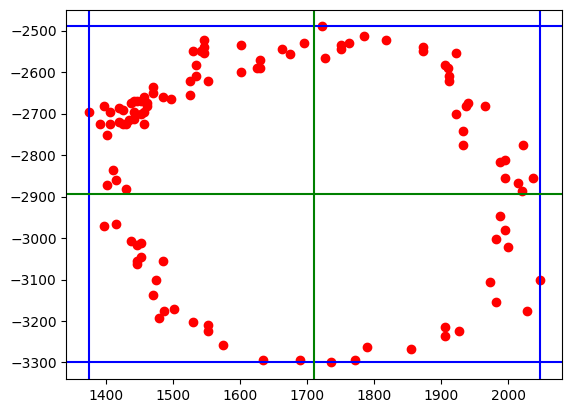

In [8]:
# Plot the data
plt.scatter(data[:,0], data[:,1] , c='r')

plt.axline((min_x, min_y), (max_x, min_y), color='b')
plt.axline((max_x, min_y), (max_x, max_y), color='b')
plt.axline((max_x, max_y), (min_x, max_y), color='b')
plt.axline((min_x, max_y), (min_x, min_y), color='b')

plt.axline((center_x, center_y), (center_x + 100, center_y), color='g')
plt.axline((center_x, center_y), (center_x, center_y + 100), color='g')

plt.show()

In [9]:
# Calculate the offset vector
translate = [-center_x, -center_y, 0]
print(translate)

[-1711.0, 2895.0, 0]


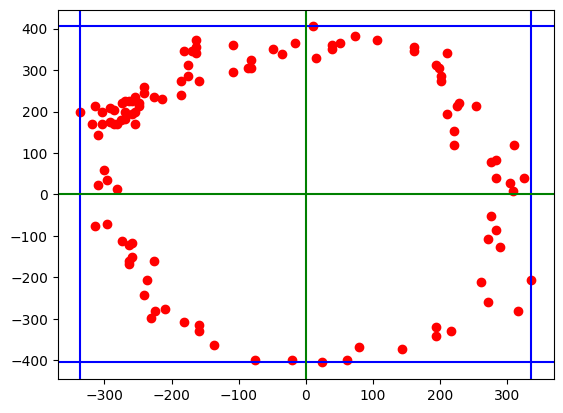

In [10]:
translated_data = data + translate

max_x = np.max(translated_data[:,0])
min_x = np.min(translated_data[:,0])
max_y = np.max(translated_data[:,1])
min_y = np.min(translated_data[:,1])

# Center points
center_x = (max_x + min_x) / 2
center_y = (max_y + min_y) / 2
# Plot the translated_data
plt.scatter(translated_data[:,0], translated_data[:,1] , c='r')

plt.axline((min_x, min_y), (max_x, min_y), color='b')
plt.axline((max_x, min_y), (max_x, max_y), color='b')
plt.axline((max_x, max_y), (min_x, max_y), color='b')
plt.axline((min_x, max_y), (min_x, min_y), color='b')

plt.axline((center_x, center_y), (center_x + 100, center_y), color='g')
plt.axline((center_x, center_y), (center_x, center_y + 100), color='g')

plt.show()

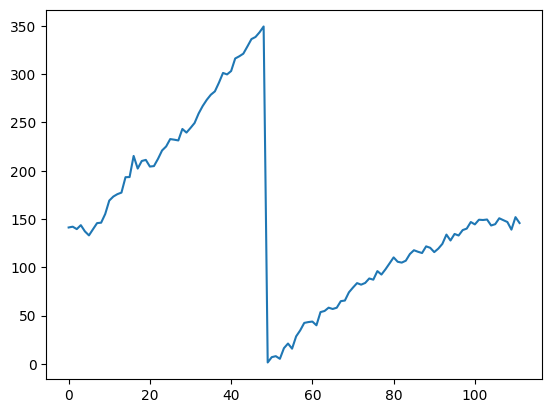

In [11]:
# Calculate degrees
def calculate_degrees(x, y):
    degrees = np.arctan2(y, x) * 180 / np.pi
    return degrees if degrees >= 0 else 360 + degrees

v_degrees = np.vectorize(calculate_degrees)
degrees = v_degrees(translated_data[:,0], translated_data[:,1])

# Plot
plt.plot(degrees)
plt.show()

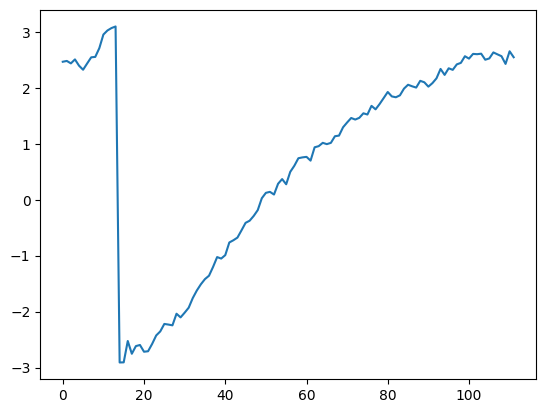

In [12]:
# Calculate radians
radians = np.arctan2(translated_data[:,1], translated_data[:,0])

plt.plot(radians)
plt.show()